<a href="https://colab.research.google.com/github/rutujahingankar/Play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

<b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Import libraries to handle dataset**

In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mounted Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')   # Read the Google play store Data

In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/User Reviews.csv') # Read the User Reviews

In [ ]:
print('The shape of data is',df.shape)


The shape of data is (10841, 13)


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


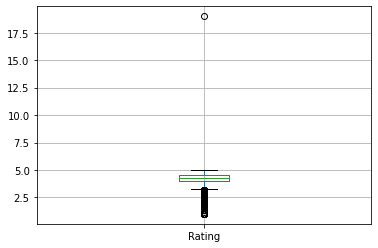

In [ ]:
df.boxplot()

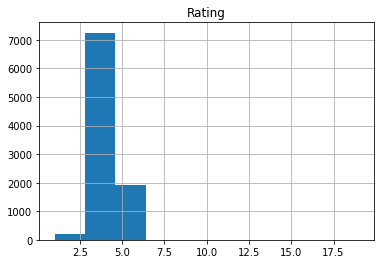

In [ ]:
df.hist();

Here we can see the rating is basically upto '5' but in our data rating showing upto '19'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull()   # We checked how many null values in our data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()  # calculate total number of null values in single column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

 checking outliers

In [ ]:
df[df.Rating>5]  # we have to find  the Ratings which is more than 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop(10472,inplace=True)  # we have drop '10472' row which has show the rating '19'

In [ ]:
df[10470:10475] # we checked the droped row which is present in data or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


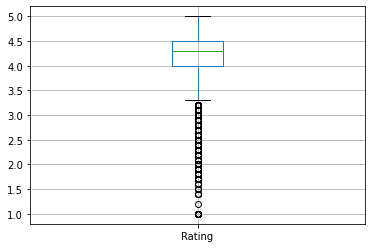

In [ ]:
df.boxplot();

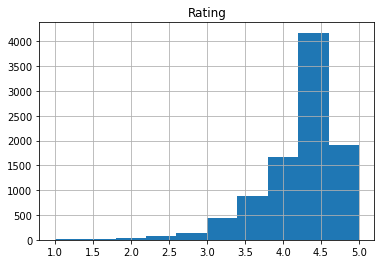

In [ ]:
df.hist();

After removing outlier the histogram and boxplot showing correct Rating

#**Data Cleaning**

In [ ]:
df['Rating']=pd.to_numeric(df['Rating'],errors='coerce')
df['Rating'].dtype

dtype('float64')

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df['Reviews']=df.Reviews.replace('0.0',0)
df['Reviews']=df.Reviews.replace('3.0M',3000000.0)
df['Reviews']=df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df.Installs.replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

#**Data Manipulation**

In [ ]:
threshold=len(df)*0.1
threshold

1084.0

In [ ]:
df.dropna(thresh=threshold,axis=1,inplace=True)

In [ ]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


#**1. Rating**

In [ ]:
df['Rating'].fillna(str(df['Rating'].mode()),inplace=True)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].astype(float)

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#**2.Type**

In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
df['Type'].fillna(str(df['Type'].mode()),inplace=True)

df['Type'].unique()


array(['Free', 'Paid', '0    Free\ndtype: object'], dtype=object)

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#**3.Current ver**

In [ ]:
df['Current Ver'].mode()

0    Varies with device
dtype: object

In [ ]:
df['Current Ver'].fillna(str(df['Current Ver'].mode()),inplace=True)


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          2
dtype: int64

#**4.Android Version**

In [ ]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [ ]:
df['Android Ver'].fillna(str(df['Android Ver'].mode()),inplace=True)

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

#**5.Size**

In [ ]:
df['Size'].fillna(str(df['Size'].mode()),inplace=True)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size'].astype(float)     

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

#**Exploratory Data Analysis**

#**Category**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


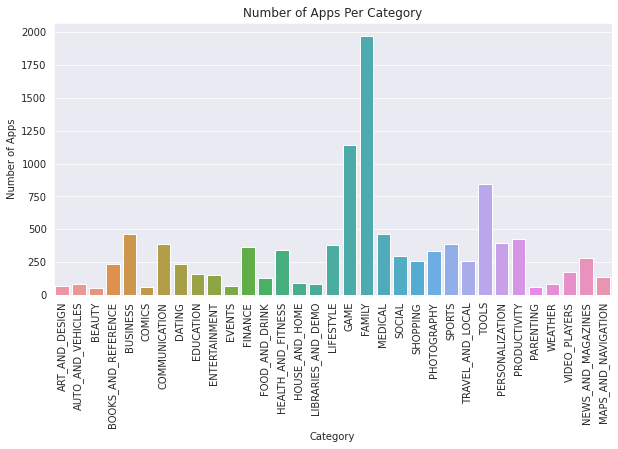

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Inference:
From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.

#**Rating**

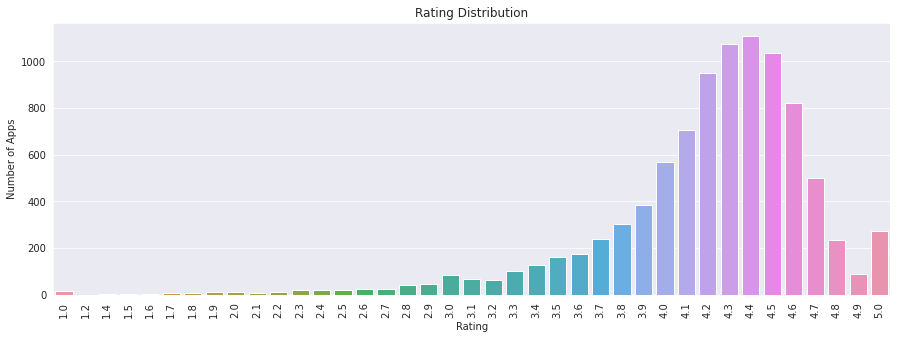

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Rating', data=df);
plt.title('Rating Distribution');
plt.xticks(rotation=90);
plt.ylabel('Number of Apps');
plt.show()

Inference:
From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

#**Type**

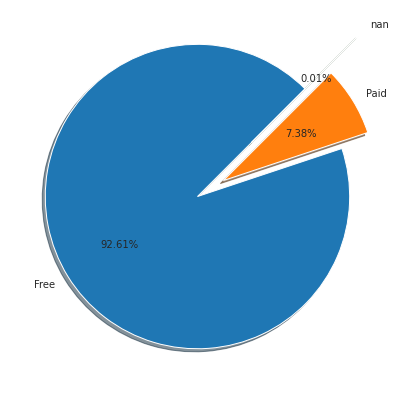

In [ ]:
plt.figure(figsize=(10, 7))
x= df.Type.value_counts()
label=["Free", "Paid",'nan']
plt.pie(x, labels = label , autopct = "%1.2f%%", explode= [0.0,0.2,0.5], shadow = True, startangle= 45)
plt.show()


Inference:
From plotting the pie chart we can see that more than 90% apps are free and only 7% are paid

#**Correlation Matrix**

<function matplotlib.pyplot.show(*args, **kw)>

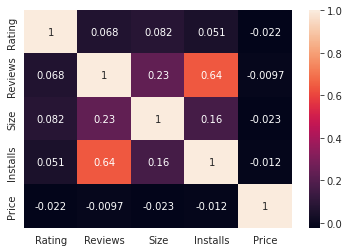

In [ ]:
corrMatrix = df.corr()

sns.heatmap(corrMatrix , annot=True)
plt.show

#**Category Vs Rating**

Text(0.5, 1.0, 'Category wise Rating')

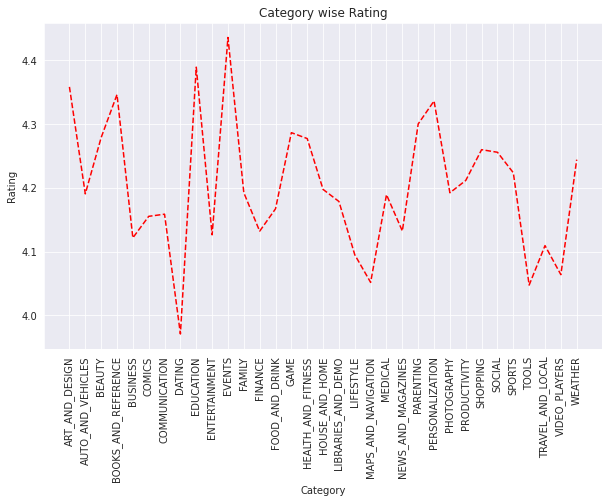

In [ ]:
grp=df.groupby('Category')
x=grp['Rating'].agg(np.mean)
plt.figure(figsize=(10,6))
plt.plot(x , 'r--' , color='r')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category wise Rating')

#**Category Vs Price**

Text(0.5, 1.0, 'Category wise Price')

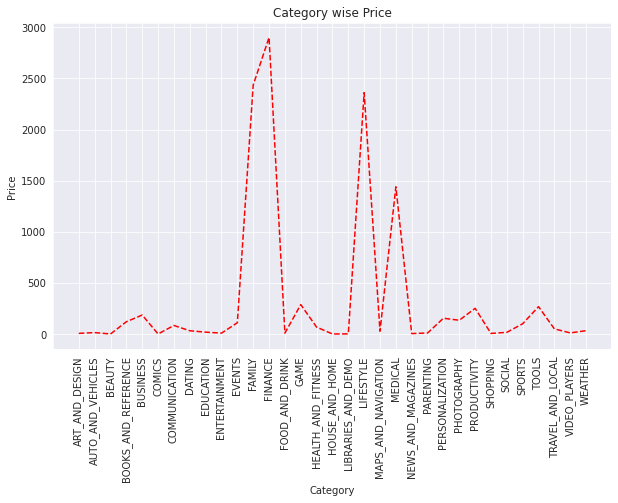

In [ ]:
grp=df.groupby('Category')
y=grp['Price'].agg(np.sum)
plt.figure(figsize=(10,6))
plt.plot(y , 'r--' , color='r')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Category wise Price')

Inference:The paid apps in the finance, Lifestyle, and Event category are on average significantly more
expensive than paid apps in other categories.

#**Category Vs Reviews**

Text(0.5, 1.0, 'Category wise Reviews')

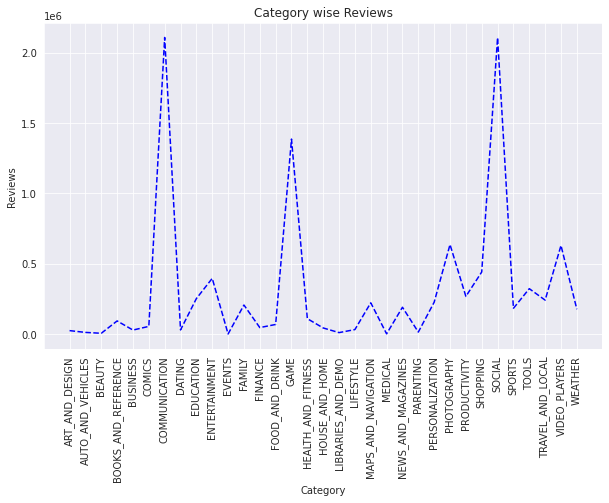

In [ ]:
grp=df.groupby('Category')
z=grp['Reviews'].agg(np.mean)
plt.figure(figsize=(10,6))
plt.plot(z , 'r--' , color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Category wise Reviews')

Inference: We can see that Communication , Social And Games are mostly review by users

#**Category Vs Installs**

Text(0.5, 1.0, 'Category wise Installs')

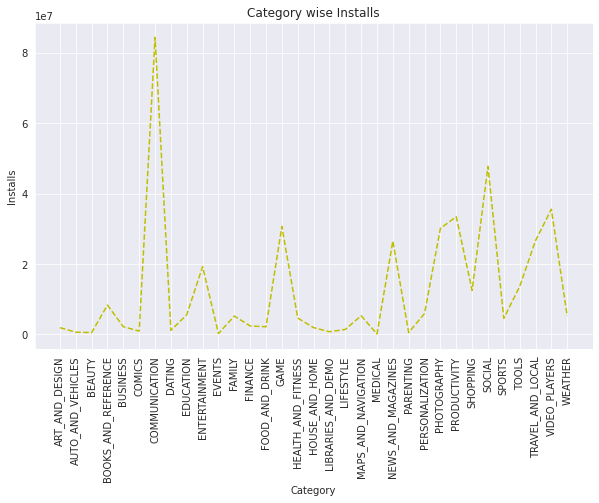

In [ ]:
grp=df.groupby('Category')
w=grp['Installs'].agg(np.mean)
plt.figure(figsize=(10,6))
plt.plot(w , 'r--' , color='y')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Category wise Installs')

Inference:
The Most installs application are as follows communication , social , video player etc.

#**Most Popular Apps**

In [ ]:
highly_reviewd_app = df.sort_values(by=['Reviews'],ascending = False).head(25)
highly_reviewd_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [ ]:
highly_reviewd_app.shape

(25, 13)

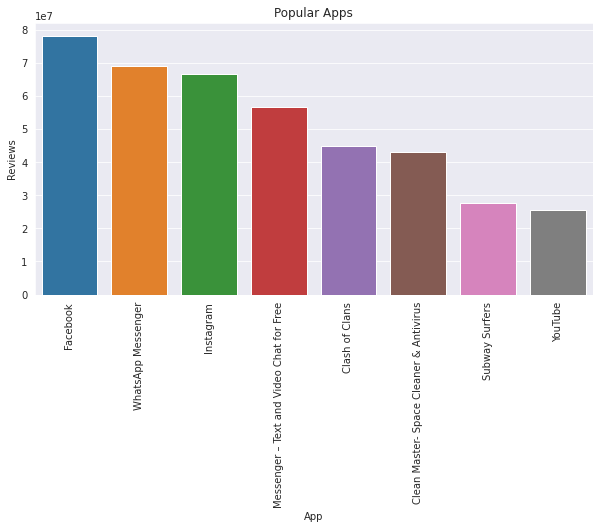

In [ ]:
plt.figure(figsize=(10 ,5))
plt.xticks(rotation= 90)
plt.xlabel('Top_Reviewed_Apps')
plt.ylabel('No. of user reviews')
plt.title('Popular Apps')
sns.barplot(x=highly_reviewd_app.App, y=highly_reviewd_app.Reviews)
plt.show()

#**Analysis Of User Review Data**

In [ ]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#Drop missing data
df_review.dropna(inplace= True)

In [ ]:
#Drop the column 
df_review.drop("Translated_Review",axis= 1, inplace= True)

In [ ]:
# Rename the remaining column 
df_review.columns = ["App", "Sentiment", "polarity", "subjectivity"]
df_review

,App,Sentiment,polarity,subjectivity
0,10 Best Foods for You,Positive,1.000000,0.533333
1,10 Best Foods for You,Positive,0.250000,0.288462
3,10 Best Foods for You,Positive,0.400000,0.875000
4,10 Best Foods for You,Positive,1.000000,0.300000
5,10 Best Foods for You,Positive,1.000000,0.300000
...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,Positive,0.800000,1.000000


In [ ]:
#shape before removing duplicates
df_review.shape

(37427, 4)

In [ ]:
len(df_review[df_review.duplicated()])

12343

In [ ]:
#list of all duplicates values
duplicate_review = df_review[df_review.duplicated(keep = 'last')]
print(duplicate_review)

                                  App Sentiment  polarity  subjectivity
0               10 Best Foods for You  Positive      1.00      0.533333
1               10 Best Foods for You  Positive      0.25      0.288462
3               10 Best Foods for You  Positive      0.40      0.875000
4               10 Best Foods for You  Positive      1.00      0.300000
5               10 Best Foods for You  Positive      1.00      0.300000
...                               ...       ...       ...           ...
64179  Hotwire Hotel & Car Rental App   Neutral      0.00      0.000000
64188  Hotwire Hotel & Car Rental App   Neutral      0.00      0.000000
64199  Housing-Real Estate & Property  Negative     -0.50      0.200000
64200  Housing-Real Estate & Property   Neutral      0.00      0.000000
64205  Housing-Real Estate & Property   Neutral      0.00      0.000000

[12343 rows x 4 columns]


In [ ]:
#Remove duplicates and save as new DataFrame
df_new_reviews = df_review.drop_duplicates()
df_new_reviews.shape

(25084, 4)

In [ ]:
df_new_reviews.isnull().sum()

App             0
Sentiment       0
polarity        0
subjectivity    0
dtype: int64

In [ ]:
df_new_reviews.describe()

,polarity,subjectivity
count,25084.000000,25084.000000
mean,0.189794,0.538103
std,0.355776,0.220541
min,-1.000000,0.000000
25%,0.000000,0.403700
50%,0.189167,0.540000
75%,0.416667,0.666667
max,1.000000,1.000000


#**Percentage of review sentiments**

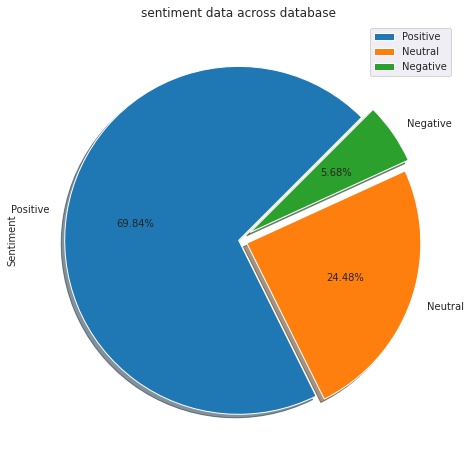

In [ ]:
plt.figure(figsize=(10,8))
labels=['Positive', 'Neutral', 'Negative']
pd.value_counts(df_new_reviews["Sentiment"]).plot(kind='pie', autopct= '%1.2f%%', shadow= True, explode=[0.0, 0.05, 0.08] ,startangle=45 ,labels= labels)
plt.legend()
plt.title("sentiment data across database")
plt.show()

Inference: From the above pie chart we can see Positive sentiment upto 70% , Neutral upto 25% appro. remaining is Negative

#**Proportionality of Subjectivity and Polarity**

In [ ]:
#merging dataframes on apps
merged_df= df.merge(df_new_reviews, on="App")

In [ ]:

subjectivity_polarity= merged_df.groupby(['Category'])['polarity', 'subjectivity'].mean().reset_index().rename(columns={'subjectivity' : 'subjectivity_avg', 'polarity':'polarity_avg'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
merged_df['subjectivity'] = merged_df['subjectivity'].abs()

In [ ]:
merged_df['polarity'] = merged_df['polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


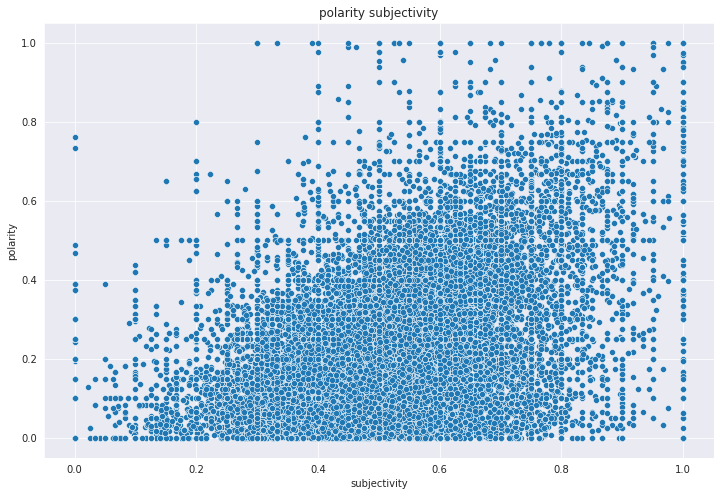

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(merged_df['subjectivity'], merged_df['polarity'])
plt.title('polarity subjectivity')
plt.show()

#**SUMMARY**
Play store app Review Analysis project was done by group of 5 members – Rahul Gaykwad,Rutuja Hingankar,Narayan Borde,Prashik Ingle and Rohit Meshram. In this project we got 2 different csv files as an input. The Csv files are play store data.csv and reviews.csv

So, We decided to divide these 2 csv files among 5 and start exploring dataset. I worked on  play store data.csv

**Rohit Meshram** :
I downloaded the project first work individually gaining insights doing some eda etcs After doing some random EDAs.I gained some confidence.I took play store data.csv The very first problem that I faced on lots of missing values in categary , rating, price,size and install.missing value show in  boxpolt and hist. caluating all unique values. drop the unrelevent data. repalce str to float in category,Reviews,Size,Price and Installs 

**Rahul Gayakwad** :
When I start to exploring play store data.csv file, then I found null values in columnus such as: rating,size ,current android version ,update version . we fill that null values with nan and using the threshold we set limit for data then drop threshold .null values are present in rating,type, android version cuurent version and type. for easy analysis  we convert str data into float 

**Rutuja Hingankar**:
Initially I started with looking at each database available to us for play store project. I went through various columns available within each of the databases tried to make sense of what all data is available to us. I took ‘review.csv’ and understood that it contained details of each app ,translated review , sentiment ,sentiment popularity and sentiment subjectivety.rename all coloums .some duplicate values present in data  find that value and drop from data set.

**Prashik Ingle**:
I work on Exploratory Data Analysis,firstly  we compare  categpry with number of app. From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and Tools.
From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or 4.7

**Narayn Borde**:
I work on Exploratory Data Analysis,firstly we compare category with rating ,price review and install sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows aproportional behavior, when variance is too high or low.There are more numbers of positive reviews of the apps in which facebook, instagram, whatsapp messanger are the most review apps.


#**CONCLUSIONS**

In this project of play store app review analysis we've drawn many intersting inferences and some  great results, here's a conclusion of few of them:


1)Maximum number of apps belongs to  the family category and gaming category.

2)Most of the apps are free very few apps are paid apps in which family 
category has the most free and paid apps and social apps like entertainment are almost free.

3)The rating is very high  with atleast 75% of the apps in the range 4.0 to 4.7.

4)Among all rating of events apps is highest whereas dating apps has lowest rating.

5)Communication and social category apps has high reviews.

6)Mostly downloaded apps are communication apps.

7)Most of the paid apps belongs to finance category.

8)There are more numbers of positive reviews of the apps in which facebook, instagram, whatsapp messanger are the most review apps.

9)sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows aproportional behavior, when variance is too high or low.
   
